# <b> Retail Sales Data Analysis </b>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import Cleaning
import datetime
import warnings
import plotly.express as px
%matplotlib inline

warnings.filterwarnings('ignore')

## <b> Questions to answer: </b>
    1.a What was our best performing month/week/weekday this quarter?
    1.b Which branch is performing the best and why are the other branches doing worse?
    2. Are there any product lines that are doing significantly worse, in total, or at the branch level?
    3. Are there any improvements that can be made to improve customer satisfaction?
    4. What are the characteristics of our best performing customer segment?
    5. What payment type should we be trying to accomodate the most?
    6. Are there any other insights that this data can produce?

In [2]:
# Load data, this contains first quarter 2019 sales data
sales = pd.read_csv("C:\\Users\\Drew\\Desktop\\Datasets\\supermarket_sales.csv")
sales.shape

(1000, 17)

### <b> Dataset dictionary</b>

In [3]:
# Invoice id: Computer generated sales slip invoice identification number
# Branch: Branch of supercenter (3 branches are available identified by A, B and C).
# City: Location of supercenters
# Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
# Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
# Unit price: Price of each product in $
# Quantity: Number of products purchased by customer
# Cogs: Cost of goods sold
# Tax: 5% tax fee for customer buying
# Total: Total price including tax
# Date: Date of purchase (Record available from January 2019 to March 2019)
# Time: Purchase time (10am to 9pm)
# Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
# Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### <b> Clean/Transform the dataset</b>

In [4]:
# Check column types and for missing values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sale Total               1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Get rid of all extra symbols and create lower case, underscore-separated names
Cleaning.col_name_clean(sales);

# Convertime column to datetime instead of object
sales['date'] = pd.to_datetime(sales['date'])

# Prepare month column
sales['month'] = sales['date'].dt.month_name()

# Get day of the week
sales['weekday'] = sales['date'].dt.day_name()

# Get week number
sales['week_of_year'] = sales['date'].dt.week

# Sort dataframe by date
sales = sales.sort_values(by='date')
sales.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,sale_total,date,time,payment,cogs,gross_margin_percentage,sale_profit,rating,month,weekday,week_of_year
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3,January,Tuesday,1
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7,January,Tuesday,1
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,January,Tuesday,1
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,January,Tuesday,1
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,January,Tuesday,1


In [6]:
# Basic descriptive statistics for sales dataframe, looking for irregularities
sales.describe()

,unit_price,quantity,tax_5,sale_total,cogs,gross_margin_percentage,sale_profit,rating,week_of_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,6.996000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,3.596515
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,4.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,10.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,13.000000


### <b> Question 1a - What was our best performing month/week/weekday this quarter?</b>

In [10]:
# Aggregate revenue by month
monthly = sales.groupby('month')['quantity','sale_total','sale_profit','cogs'].sum().sort_values('sale_total',ascending=False)
monthly['tranactions'] = sales.groupby('month')['invoice_id'].count()
monthly

,quantity,sale_total,sale_profit,cogs,tranactions
month,,,,,
January,1965,116291.868,5537.708,110754.16,352
March,1891,109455.507,5212.167,104243.34,345
February,1654,97219.374,4629.494,92589.88,303


In [9]:
# Aggregate revenue by week
weekly = sales.groupby('week_of_year')['quantity','sale_total','sale_profit','cogs'].sum().sort_values('sale_total',ascending=False)
weekly['tranactions'] = sales.groupby('week_of_year')['invoice_id'].count()
weekly

,quantity,sale_total,sale_profit,cogs,tranactions
week_of_year,,,,,
4,489,29286.8835,1394.6135,27892.27,93
9,465,29219.7150,1391.4150,27828.30,87
3,461,28693.3605,1366.3505,27327.01,82
10,496,28418.8380,1353.2780,27065.56,88
5,484,28360.4475,1350.4975,27009.95,83
6,506,27101.8335,1290.5635,25811.27,92
7,399,25563.5940,1217.3140,24346.28,72
12,405,25120.5990,1196.2190,23924.38,76
2,431,24461.1990,1164.8190,23296.38,73


In [11]:
# Aggregate revenue by day
daily = sales.groupby('weekday')['quantity','sale_total','sale_profit','cogs'].sum().sort_values('sale_total',ascending=False)
daily['transactions'] = sales.groupby('weekday')['invoice_id'].count()
daily

,quantity,sale_total,sale_profit,cogs,transactions
weekday,,,,,
Saturday,919,56120.8095,2672.4195,53448.39,164
Tuesday,862,51482.2455,2451.5355,49030.71,158
Thursday,755,45349.2480,2159.4880,43189.76,138
Sunday,778,44457.8925,2117.0425,42340.85,133
Friday,758,43926.3405,2091.7305,41834.61,139
Wednesday,800,43731.1350,2082.4350,41648.70,143
Monday,638,37899.0780,1804.7180,36094.36,125


#### <b> Answer </b>

- January was the best performing month this quarter generating 36% of total quarterly revenue, and saw the highest amount of visitors as well as products sold. Also, February saw just under a 20% drop in revenue from January, which was partially offset by the 12.6% revenue increase in March.
- Based on the weekly analysis, the last half of January and first two weeks of March peformed the best. Almost all of February was similar unlike the other months that had drastically different weekly characteristics.
- Looking at the weekdays, we see Saturday, Tuesday, and Thursday are performing the best. It is important to note that Wednesday, while not the best in terms of revenue, is the 3rd busiest day of the week in terms of transactions and products sold. 

### <b> Question 1b - Which branch is performing the best ?</b>

In [14]:
# View of each branch's summed characteristics
branch = sales.groupby(['branch']).sum()
branch['transactions'] = sales.groupby('branch')['invoice_id'].count()
branch['average_price_product'] = sales.groupby('branch').unit_price.mean()
branch['average_total_sale'] = sales.groupby('branch').sale_total.mean()
branch[['quantity','sale_total','sale_profit','cogs','average_price_product','average_total_sale','transactions']]
branch.sort_values('sale_total',ascending=False)

,unit_price,quantity,tax_5,sale_total,cogs,gross_margin_percentage,sale_profit,rating,week_of_year,transactions,average_price_product,average_total_sale
branch,,,,,,,,,,,,
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,2230,328,56.609024,337.099715
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,2426,340,54.780853,312.354031
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,2340,332,55.659277,319.872506


In [11]:
monthly_branch = sales.groupby(['branch','month']).sum().sort_values('sale_total',ascending=False)
monthly_branch

unit_price  quantity      tax_5  sale_total      cogs  \
branch month                                                             
C      January      6859.95       680  1925.4610  40434.6810  38509.22   
A      January      6349.53       685  1841.9585  38681.1285  36839.17   
       March        6845.03       681  1793.2915  37659.1215  35865.83   
C      March        5898.84       614  1771.3830  37199.0430  35427.66   
B      January      6544.41       600  1770.2885  37176.0585  35405.77   
       March        6014.85       596  1647.4925  34597.3425  32949.85   
       February     5919.62       624  1639.2510  34424.2710  32785.02   
C      February     5808.97       537  1568.3325  32934.9825  31366.65   
A      February     5430.93       493  1421.9105  29860.1205  28438.21   

                 gross_margin_percentage  sale_profit  rating  week_of_year  
branch month                                                                 
C      January                580.952381    1925.4610   872.9           382  
A      January                566.666667    1841.9585   842.3           344  
       March                  604.761905    1793.2915   888.2          1428  
C      March                  504.761905    1771.3830   727.0          1170  
B      January                528.571429    1770.2885   755.0           338  
       March                  533.333333    1647.4925   744.7          1223  
       February               519.047619    1639.2510   763.9           779  
C      February               476.190476    1568.3325   720.0           678  
A      February               447.619048    1421.9105   658.7           654

#### <b> Answer </b>
- We see Branch C is producing the most revenue, while Branch A is moving the most amount of products.
    - This is clear by the lower unique transactions but higher average sale total for Branch C. 
- Branch A and B are identical in sales, but the makeup of their items sold are different. Branch A is moving a lot of lower price items but thier customers are buying more in total.
- The monthly breakdown for each branch is unsurprising, considering what we saw earlier.
- Branch B is consistent, even though it is the worst performing. 
- As we see, Branch A and C seem to have near perfect correlation in terms of monthly performance, granted their monthly rank isn't exactly the same. 
- A relatively odd dip during February. We could assume that January was a better month due the New Years Resolutions crowd, but the month of March makes it appear as though February was abnormally low. 
- You would assume that with a holiday in February, and given the product lines that are sold, the month would almost outperform the surrounding months. 

### <b>Question 2 - Which products are performing the worst? </b>

In [55]:
# Product line breakdown
products = sales.groupby(['product_line']).sum()
products['transactions'] = sales.groupby('product_line')['invoice_id'].count()
products.sort_values('sale_total',ascending=False)

,unit_price,quantity,tax_5,sale_total,cogs,gross_margin_percentage,sale_profit,rating,week_of_year,transactions
product_line,,,,,,,,,,
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,1224,174
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,1082,166
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,1255,170
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,1207,178
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,1111,160
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,1117,152


[Text(0, 0, '971'),
 Text(0, 0, '902'),
 Text(0, 0, '952'),
 Text(0, 0, '854'),
 Text(0, 0, '911'),
 Text(0, 0, '920')]

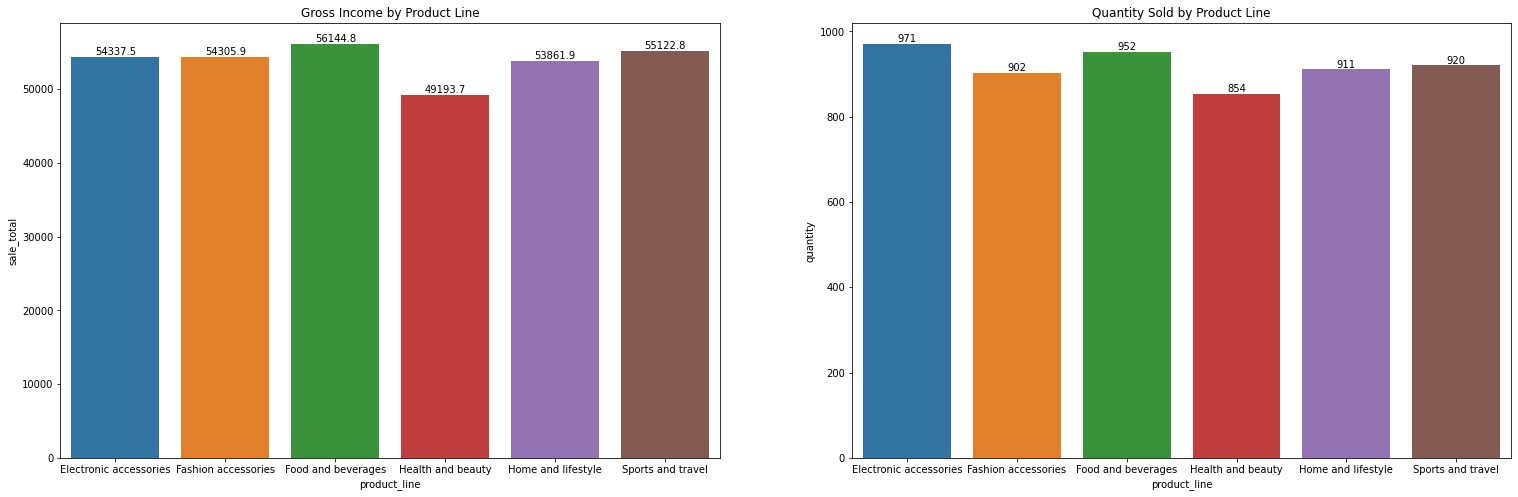

In [43]:
# Product line Revenue & Quantity Sold
order = products.sort_values('sale_total',ascending=False).index
quan = products.sort_values('quantity',ascending=False).index
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(26,8))
sns.barplot(x=products.index, y='sale_total', data=products, errwidth=False, ax=ax1)
ax1.set_title('Gross Income by Product Line')
ax1.bar_label(ax1.containers[0])
sns.barplot(x=products.index, y='quantity', data=products, errwidth=False, ax=ax2)
ax2.set_title('Quantity Sold by Product Line')
ax2.bar_label(ax2.containers[0])

In [38]:
# Branch level product line breakdown
branch_products = sales.groupby(['branch','product_line']).sum()
branch_products

unit_price  quantity      tax_5  sale_total  \
branch product_line                                                          
A      Electronic accessories     3292.27       322   872.2435  18317.1135   
       Fashion accessories        2890.19       263   777.7385  16332.5085   
       Food and beverages         3188.52       313   817.2905  17163.1005   
       Health and beauty          2343.53       257   599.8930  12597.7530   
       Home and lifestyle         3629.97       371  1067.4855  22417.1955   
       Sports and travel          3281.01       333   922.5095  19372.6995   
B      Electronic accessories     2741.98       316   811.9735  17051.4435   
       Fashion accessories        3400.32       297   781.5865  16413.3165   
       Food and beverages         2777.00       270   724.5185  15214.8885   
       Health and beauty          3083.84       320   951.4600  19980.6600   
       Home and lifestyle         2775.70       295   835.6745  17549.1645   
       Sports and travel          3700.04       322   951.8190  19988.1990   
C      Electronic accessories     3069.52       333   903.2845  18968.9745   
       Fashion accessories        3882.84       342  1026.6700  21560.0700   
       Food and beverages         3780.02       369  1131.7550  23766.8550   
       Health and beauty          2910.51       277   791.2060  16615.3260   
       Home and lifestyle         2445.04       245   661.6930  13895.5530   
       Sports and travel          2479.83       265   750.5680  15761.9280   

                                   cogs  gross_margin_percentage  sale_profit  \
branch product_line                                                             
A      Electronic accessories  17444.87               285.714286     872.2435   
       Fashion accessories     15554.77               242.857143     777.7385   
       Food and beverages      16345.81               276.190476     817.2905   
       Health and beauty       11997.86               223.809524     599.8930   
       Home and lifestyle      21349.71               309.523810    1067.4855   
       Sports and travel       18450.19               280.952381     922.5095   
B      Electronic accessories  16239.47               261.904762     811.9735   
       Fashion accessories     15631.73               295.238095     781.5865   
       Food and beverages      14490.37               238.095238     724.5185   
       Health and beauty       19029.20               252.380952     951.4600   
       Home and lifestyle      16713.49               238.095238     835.6745   
       Sports and travel       19036.38               295.238095     951.8190   
C      Electronic accessories  18065.69               261.904762     903.2845   
       Fashion accessories     20533.40               309.523810    1026.6700   
       Food and beverages      22635.10               314.285714    1131.7550   
       Health and beauty       15824.12               247.619048     791.2060   
       Home and lifestyle      13233.86               214.285714     661.6930   
       Sports and travel       15011.36               214.285714     750.5680   

                               rating  week_of_year  
branch product_line                                  
A      Electronic accessories   414.7           446  
       Fashion accessories      350.8           340  
       Food and beverages       420.7           445  
       Health and beauty        324.3           370  
       Home and lifestyle       450.5           438  
       Sports and travel        428.2           387  
B      Electronic accessories   391.4           385  
       Fashion accessories      416.8           424  
       Food and beverages       349.7           328  
       Health and beauty        376.3           414  
       Home and lifestyle       325.8           360  
       Sports and travel        403.6           429  
C      Electronic accessories   371.1           424  
       Fashion accessories      483.6  

#### <b> Answer </b>
- We see that Health & Beauty products are doing the least amount of revenue which corresponds with the it also having the lowest number of products sold.
- Food & Beverage as well as Sports & Travel are the two best performing product lines.
- Bracnh B has the most even distribution of income across product lines while both Branch A and B have a distinct worst line.
- On the other hand, both Branch A and C have one (two for Branch C) product line that produces a higher proportion of gross income.
- Could let the branches begin to focus more on those areas of success and phase out the worse performing product lines monitoring for change in foot traffic depending on changes in product availability.

### <b> Question 3 - Are there any improvements that can be made to improve customer satisfaction? </b>

In [19]:
# Average branch rating
print(sales.groupby('branch').rating.mean())

# Deeper dive into the customer ratings
print(sales.groupby(['branch','product_line'])[['rating','quantity']].mean())

# Gendered discrepencies?
branchB = sales[sales.branch == 'B']
branchB.groupby(['branch','product_line', 'gender'])[['rating','quantity']].mean()

branch
A    7.027059
B    6.818072
C    7.072866
Name: rating, dtype: float64
                                 rating  quantity
branch product_line                              
A      Electronic accessories  6.911667  5.366667
       Fashion accessories     6.878431  5.156863
       Food and beverages      7.253448  5.396552
       Health and beauty       6.900000  5.468085
       Home and lifestyle      6.930769  5.707692
       Sports and travel       7.257627  5.644068
B      Electronic accessories  7.116364  5.745455
       Fashion accessories     6.722581  4.790323
       Food and beverages      6.994000  5.400000
       Health and beauty       7.100000  6.037736
       Home and lifestyle      6.516000  5.900000
       Sports and travel       6.509677  5.193548
C      Electronic accessories  6.747273  6.054545
       Fashion accessories     7.440000  5.261538
       Food and beverages      7.080303  5.590909
       Health and beauty       6.998077  5.326923
       Home and lifest

rating  quantity
branch product_line           gender                    
B      Electronic accessories Female  7.103571  5.571429
                              Male    7.129630  5.925926
       Fashion accessories    Female  6.681818  5.363636
                              Male    6.768966  4.137931
       Food and beverages     Female  7.324138  5.827586
                              Male    6.538095  4.809524
       Health and beauty      Female  7.290000  5.600000
                              Male    6.984848  6.303030
       Home and lifestyle     Female  6.604545  6.681818
                              Male    6.446429  5.285714
       Sports and travel      Female  6.370000  5.000000
                              Male    6.640625  5.375000

#### <b> Answer </b>
- There seems to be some customer relations issues at branch B as they have the second highest number of unique transactions but the lowest overall average ratings
- It appears as though Home & Lifestyle and Sprots & Travel products (employees stationed to help in those areas) are producing the worst ratings for branch B and bringing down their overall average
- We see that both males and females are relatively unhappy with both product lines, but there is specific gender unhappiness with each line while amount being purchased informs that this isn't a sample size issue

### <b> Quetion 4 - What are the characteristics of our best performing customer segment? </b>

In [20]:
# Type of customer characteristics
customer = sales.groupby(['customer_type']).sum()
customer

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
customer_type,,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,156403.28,2385.714286,7820.164,3477.1,996
Normal,27512.43,2725,7559.205,158743.305,151184.10,2376.190476,7559.205,3495.6,997


In [24]:
# Gendered Characteristics
gender = sales.groupby(['gender']).sum()
gender

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating,month
gender,,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2,987
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5,1006


In [17]:
# Branch breakdown by gender
branch_gender = sales.groupby(['branch','gender']).sum()
branch_gender

unit_price  quantity      tax_5       total      cogs  \
branch gender                                                          
A      Female     9029.87       909  2536.6270  53269.1670  50732.54   
       Male       9595.62       950  2520.5335  52931.2035  50410.67   
B      Female     8775.24       911  2520.3950  52928.2950  50407.90   
       Male       9703.64       909  2536.6370  53269.3770  50732.74   
C      Female     9882.13      1049  2937.4030  61685.4630  58748.06   
       Male       8685.63       782  2327.7735  48883.2435  46555.47   

               gross_margin_percentage  gross_income  rating  month  
branch gender                                                        
A      Female               766.666667     2536.6270  1101.1    333  
       Male                 852.380952     2520.5335  1288.1    355  
B      Female               771.428571     2520.3950  1114.0    315  
       Male                 809.523810     2536.6370  1149.6    350  
C      Female               847.619048     2937.4030  1274.1    339  
       Male                 714.285714     2327.7735  1045.8    301

In [21]:
# Customer type ratings
sales.groupby(['customer_type'])['rating'].mean()

customer_type
Member    6.940319
Normal    7.005210
Name: rating, dtype: float64

In [22]:
# Customer type gendered breakdown
sales.groupby(['customer_type','gender']).sum()

unit_price  quantity      tax_5       total      cogs  \
customer_type gender                                                          
Member        Female    14558.14      1492  4197.4735  88146.9435  83949.47   
              Male      13601.56      1293  3622.6905  76076.5005  72453.81   
Normal        Female    13129.10      1377  3796.9515  79735.9815  75939.03   
              Male      14383.33      1348  3762.2535  79007.3235  75245.07   

                      gross_margin_percentage  gross_income  rating  month  
customer_type gender                                                        
Member        Female              1242.857143     4197.4735  1811.5    522  
              Male                1142.857143     3622.6905  1665.6    474  
Normal        Female              1142.857143     3796.9515  1677.7    465  
              Male                1233.333333     3762.2535  1817.9    532

In [23]:
# Customer type gendered unique transactions
sales.groupby(['customer_type','gender'])['invoice_id'].count()

customer_type  gender
Member         Female    261
               Male      240
Normal         Female    240
               Male      259
Name: invoice_id, dtype: int64

In [43]:
sales.groupby('gender').quantity.mean(), sales.groupby('gender').unit_price.mean(), sales.groupby('gender').rating.mean() 

(gender
 Female    5.726547
 Male      5.292585
 Name: quantity, dtype: float64,
 gender
 Female    55.263952
 Male      56.081944
 Name: unit_price, dtype: float64,
 gender
 Female    6.964471
 Male      6.980962
 Name: rating, dtype: float64)

In [48]:
# Branch breakdown for cusotmer type and gender
sales.groupby(['branch','customer_type','gender']).sum()

unit_price  quantity      tax_5  sale_total  \
branch customer_type gender                                                
A      Member        Female     4469.45       465  1268.7175  26643.0675   
                     Male       4612.04       499  1285.4480  26994.4080   
       Normal        Female     4560.42       444  1267.9095  26626.0995   
                     Male       4983.58       451  1235.0855  25936.7955   
B      Member        Female     4479.46       479  1278.5920  26850.4320   
                     Male       4653.21       445  1278.7740  26854.2540   
       Normal        Female     4295.78       432  1241.8030  26077.8630   
                     Male       5050.43       464  1257.8630  26415.1230   
C      Member        Female     5609.23       548  1650.1640  34653.4440   
                     Male       4336.31       349  1058.4685  22227.8385   
       Normal        Female     4272.90       501  1287.2390  27032.0190   
                     Male       4349.32       433  1269.3050  26655.4050   

                                 cogs  gross_margin_percentage  sale_profit  \
branch customer_type gender                                                   
A      Member        Female  25374.35               380.952381    1268.7175   
                     Male    25708.96               414.285714    1285.4480   
       Normal        Female  25358.19               385.714286    1267.9095   
                     Male    24701.71               438.095238    1235.0855   
B      Member        Female  25571.84               404.761905    1278.5920   
                     Male    25575.48               380.952381    1278.7740   
       Normal        Female  24836.06               366.666667    1241.8030   
                     Male    25157.26               428.571429    1257.8630   
C      Member        Female  33003.28               457.142857    1650.1640   
                     Male    21169.37               347.619048    1058.4685   
       Normal        Female  25744.78               390.476190    1287.2390   
                     Male    25386.10               366.666667    1269.3050   

                             rating  week_of_year  
branch customer_type gender                        
A      Member        Female   542.9           585  
                     Male     625.9           579  
       Normal        Female   558.2           590  
                     Male     662.2           672  
B      Member        Female   585.3           593  
                     Male     531.8           573  
       Normal        Female   528.7           501  
                     Male     617.8           673  
C      Member        Female   683.3           623  
                     Male     507.9           526  
       Normal        Female   590.8           538  
                     Male     537.9           543

#### <b> Answer </b>
- Members are the best customers, but there is a problem with the male members as they are the worst subset of all customers even though they are doing the same amount of transactions as female non-members, which generate the second highest gross income
- Female customers generate the most gross income but appear to be unhappy with the branches A & B while being comparatively happier with C
- Females are bringing in more revenue, but we see that males are buying the more expensive items, on average
- This average unit price difference is made up by females purhcasing more total items on average than males
- Also, males are slightly happier with thier experience than females 

### <b> Question 5 - What payment type should we be trying to accomodate the most? </b>

In [57]:
# Payment type 
payment = sales.groupby(['payment']).sum()
payment['transactions'] = sales.groupby('payment')['invoice_id'].count()
payment[['quantity','sale_total','sale_profit','cogs','transactions']]

,quantity,sale_total,sale_profit,cogs,transactions
payment,,,,,
Cash,1896,112206.570,5343.170,106863.40,344
Credit card,1722,100767.072,4798.432,95968.64,311
Ewallet,1892,109993.107,5237.767,104755.34,345


#### <b> Answer </b>
- Cash and Ewallet being nearly identical in usage, but Cash is generating the most revenue. 
- One might expect that if not using Ewallet, a credit card would be used instead as Ewallet is a credit card without needing the card on hand.
- Actions could be taken to push for CC or Ewallet usage to reduce transactions times at checkout.

### <b> Question 6 - Are there any other insights that this data can produce? </b>

In [30]:
# Monthly product line breakdown across all branches
sales.groupby(['month','product_line']).sum()

unit_price  quantity      tax_5       total  \
month product_line                                                          
1     Electronic accessories     2950.21       333   896.7280  18831.2880   
      Fashion accessories        3543.65       336   921.1960  19345.1160   
      Food and beverages         3237.38       325   931.9300  19570.5300   
      Health and beauty          2857.81       254   780.1510  16383.1710   
      Home and lifestyle         3337.09       342   975.9400  20494.7400   
      Sports and travel          3827.75       375  1031.7630  21667.0230   
2     Electronic accessories     2938.94       313   826.8050  17362.9050   
      Fashion accessories        3716.89       295   905.2315  19009.8615   
      Food and beverages         3367.99       349   952.3980  20000.3580   
      Health and beauty          2486.34       266   695.3455  14602.2555   
      Home and lifestyle         2100.08       205   592.1135  12434.3835   
      Sports and travel          2549.28       226   657.6005  13809.6105   
3     Electronic accessories     3214.62       325   863.9685  18143.3385   
      Fashion accessories        2912.81       271   759.5675  15950.9175   
      Food and beverages         3140.17       278   789.2360  16573.9560   
      Health and beauty          2993.73       334   867.0625  18208.3125   
      Home and lifestyle         3413.54       364   996.7995  20932.7895   
      Sports and travel          3083.85       319   935.5330  19646.1930   

                                  cogs  gross_margin_percentage  gross_income  \
month product_line                                                              
1     Electronic accessories  17934.56               257.142857      896.7280   
      Fashion accessories     18423.92               304.761905      921.1960   
      Food and beverages      18638.60               266.666667      931.9300   
      Health and beauty       15603.02               233.333333      780.1510   
      Home and lifestyle      19518.80               280.952381      975.9400   
      Sports and travel       20635.26               333.333333     1031.7630   
2     Electronic accessories  16536.10               257.142857      826.8050   
      Fashion accessories     18104.63               285.714286      905.2315   
      Food and beverages      19047.96               295.238095      952.3980   
      Health and beauty       13906.91               219.047619      695.3455   
      Home and lifestyle      11842.27               180.952381      592.1135   
      Sports and travel       13152.01               204.761905      657.6005   
3     Electronic accessories  17279.37               295.238095      863.9685   
      Fashion accessories     15191.35               257.142857      759.5675   
      Food and beverages      15784.72               266.666667      789.2360   
      Health and beauty       17341.25               271.428571      867.0625   
      Home and lifestyle      19935.99               300.000000      996.7995   
      Sports and travel       18710.66               252.380952      935.5330   

                              rating  
month product_line                    
1     Electronic accessories   385.7  
      Fashion accessories      451.9  
      Food and beverages       414.7  
      Health and beauty        349.3  
      Home and lifestyle       393.7  
      Sports and travel        474.9  
2     Electronic accessories   376.1  
      Fashion accessories      424.9  
      Food and beverages       434.8  
      Health and beauty        331.5  
      Home and lifestyle       268.7  
      Sports and travel        306.6  
3     Electronic accessories   415.4  
      Fashion accessories      374.4  
      Food and beverages       388.2  
      Health and beauty        383.7  
      Home and lifestyle       431.6  
      Sports and travel        366.6

In [31]:
# Separate df's so that they consist of only specific branches, B was performed earlier
branchA = sales[sales.branch=='A']
branchC = sales[sales.branch=='C']

- We see Branch B did not suffere as significant of a drop in revenue as branches A & C did.
- Referring back to the product distirbution, this makes sense becasue branch B did not rely too heavily on specific product lines like A & C do. 

[Text(0, 0, '680'), Text(0, 0, '537'), Text(0, 0, '614')]

<Figure size 864x576 with 0 Axes>

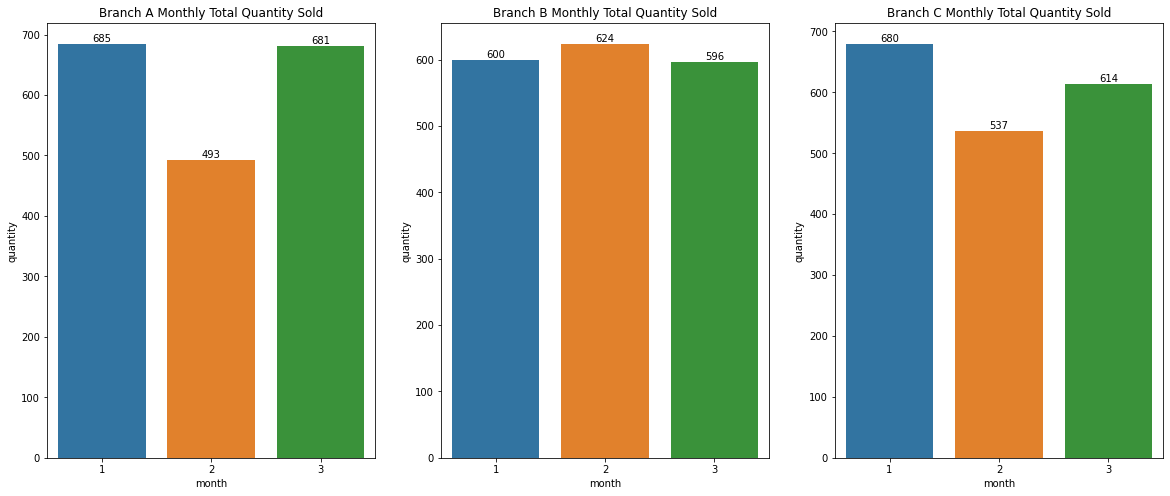

In [34]:
# View Monthly Quantity Differences by Branch
plt.figure(figsize=(12,8))
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=False,figsize=(20,8))
sns.barplot(x=Agroup.index, y=Agroup.quantity, data=Agroup,ax=ax1)
ax1.set_title('Branch A Monthly Total Quantity Sold')
ax1.bar_label(ax1.containers[0])
sns.barplot(x=Bgroup.index, y=Bgroup.quantity, data=Bgroup,ax=ax2)
ax2.set_title('Branch B Monthly Total Quantity Sold')
ax2.bar_label(ax2.containers[0])
sns.barplot(x=Cgroup.index, y=Cgroup.quantity, data=Cgroup,ax=ax3)
ax3.set_title('Branch C Monthly Total Quantity Sold')
ax3.bar_label(ax3.containers[0])

In [94]:
# Try a basic clustering to see if there is any potential 

from sklearn.cluster import KMeans

In [64]:
sales.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,sale_total,...,time,payment,cogs,gross_margin_percentage,sale_profit,rating,month,weekday,week_of_year,spending_rank
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,...,19:31,Cash,168.96,4.761905,8.448,6.3,January,Tuesday,1,636.0
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,...,13:55,Cash,591.66,4.761905,29.583,7.7,January,Tuesday,1,147.0
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,...,14:47,Cash,380.72,4.761905,19.036,5.7,January,Tuesday,1,321.0
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,...,20:26,Ewallet,108.16,4.761905,5.408,6.9,January,Tuesday,1,768.0
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,...,11:43,Cash,125.74,4.761905,6.287,5.0,January,Tuesday,1,735.0


In [60]:
# Create a spending rank score
sales['spending_rank'] = sales['sale_total'].rank(method='max',ascending=False)

In [88]:
coded = sales.copy()

In [91]:
# Get columns that need to be transfomred into categorical columns
col = ['branch','customer_type','gender','product_line','payment']

coded[col] = coded[col].astype('category')

In [90]:
# Loop through the column names at turn them into label ecnoded columns
for i in col:
    coded[i] = coded[i].cat.codes

In [92]:
coded.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,sale_total,...,time,payment,cogs,gross_margin_percentage,sale_profit,rating,month,weekday,week_of_year,spending_rank
856,770-42-8960,1,Mandalay,1,1,2,21.12,8,8.448,177.408,...,19:31,0,168.96,4.761905,8.448,6.3,January,Tuesday,1,636.0
567,651-88-7328,0,Yangon,1,0,1,65.74,9,29.583,621.243,...,13:55,0,591.66,4.761905,29.583,7.7,January,Tuesday,1,147.0
245,530-90-9855,0,Yangon,0,1,4,47.59,8,19.036,399.756,...,14:47,0,380.72,4.761905,19.036,5.7,January,Tuesday,1,321.0
696,182-52-7000,0,Yangon,0,0,5,27.04,4,5.408,113.568,...,20:26,2,108.16,4.761905,5.408,6.9,January,Tuesday,1,768.0
523,133-14-7229,2,Naypyitaw,1,1,3,62.87,2,6.287,132.027,...,11:43,0,125.74,4.761905,6.287,5.0,January,Tuesday,1,735.0


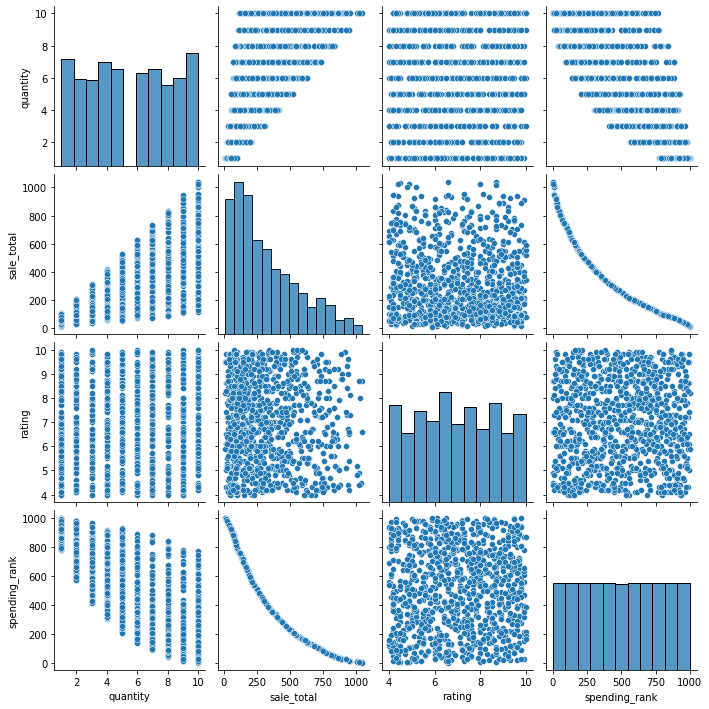

In [93]:
sns.pairplot(coded[['branch','customer_type','gender','product_line','payment','quantity','sale_total','rating','spending_rank']])

Text(0.5, 1.0, 'Finding Optimal Number of Clusters')

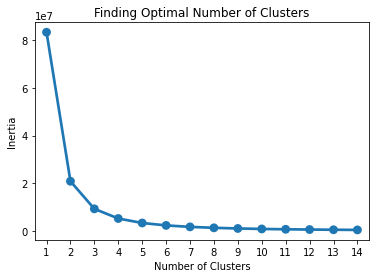

In [100]:
# From the pairplot above, we will look at clustering with spending_rank and customer ratings

# First we will find the optimal number of cluster by plotting the intertia from different numbers of clusters
df1 = coded[['spending_rank','rating']]
inert = []

for i in range(1,15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=1000,random_state=1)
    km = km.fit(df1)
    inert.append(km.inertia_)
    
clusters = [ i for i in range(1,15)] # generate values for x axis

sns.pointplot(x=clusters,y=inert) # create a chart that will allow use of the 'elbow method' for determining the optimal number of clusters
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Finding Optimal Number of Clusters')

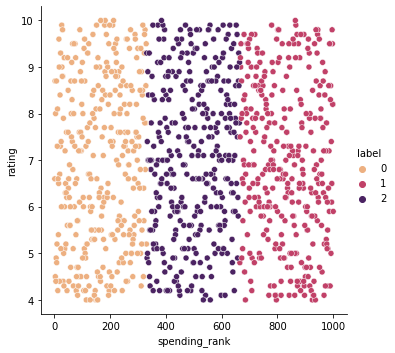

In [101]:
# We see, from the elbow, that the optimal number is more than likely three clusters

model = KMeans(n_clusters=3, init='k-means++', max_iter=1000,random_state=1) # fit the new model with the optimal number of clusters found above
model.fit(df1)

df1['label']= model.fit_predict(df1) # create a new column in the dataframe with the predicted value labels

sns.relplot(x='spending_rank',y='rating',hue='label', data=df1,palette='flare') # visualize the clustering algorithm

- As we can see from the graph, the clusters are primarily formed on the amount spent for a given customer due to the equal distribution of ratings.
- We could potentially split the customers into more segments by creating unhappy/content/pleased sytem based on the ratings that they provide.
    - This would allow for further deeper segmentation which could lead to better targeting. 
- Ran but not shown, were incresed clusters, but it simply decreased spending ranges, not bringing much more insight.